<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Food_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("train_fd.csv")
df_test = pd.read_csv("test_fd.csv")
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [4]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
train = pd.merge(df_train, center_info, on = 'center_id')
test = pd.merge(df_test, center_info, on = 'center_id')
train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [9]:
train = pd.merge(train, meal_info, on = 'meal_id')
train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


In [10]:
train['num_orders'].groupby(train['center_type'])

In [11]:
len(list(train['num_orders'].groupby(train['center_type'])))

3

In [12]:
np.mean(list(train['num_orders'].groupby(train['center_type']))[2][1])

206.6700972959947

In [13]:
train.groupby('center_type').agg({'num_orders':['sum', 'mean', lambda x: np.max(x) - np.min(x)]})

num_orders                     
                   sum        mean <lambda>
center_type                                
TYPE_A        68978517  262.394456    24286
TYPE_B        29996073  318.856145    13567
TYPE_C        20582895  206.670097    10111

In [14]:
test = pd.merge(test, meal_info, on = 'meal_id')
test.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


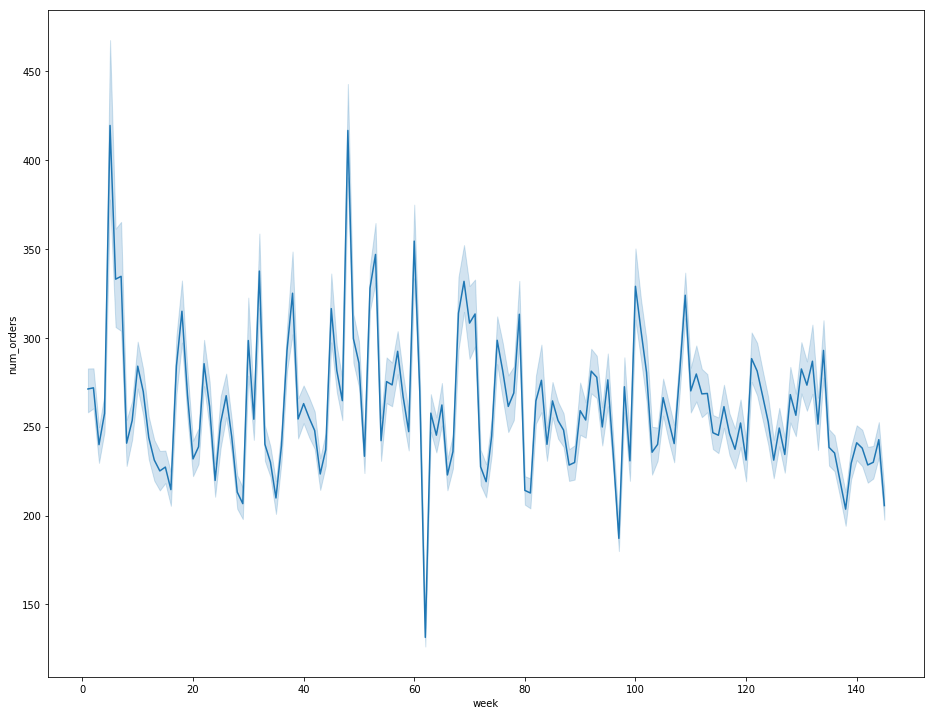

In [15]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,12.27
sns.lineplot(train['week'],train['num_orders']) # takes the mean of all num_orders in every week and plots the graph in confidence intervals

In [16]:
np.mean(train.loc[train['week'] == 3,'num_orders'])

239.82821662642291

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

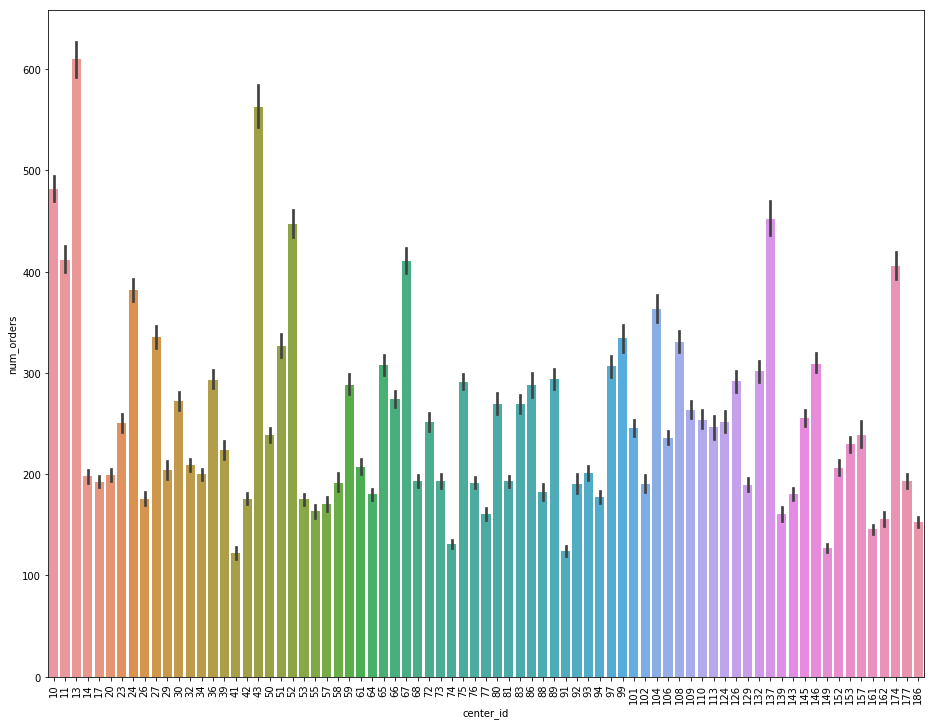

In [17]:

sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

In [18]:
np.mean(train.loc[train['center_id'] == 13, 'num_orders'])

609.7849843883055

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

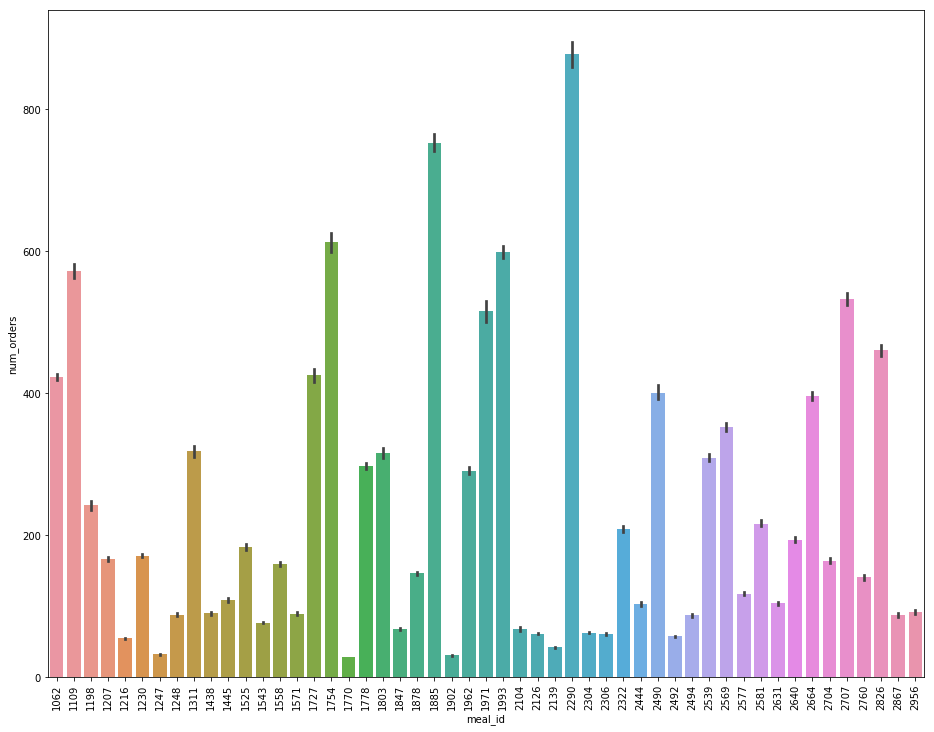

In [19]:
sns.barplot(train['meal_id'],train['num_orders'])
plt.xticks(rotation = 90)

In [20]:
np.mean(train.loc[train['meal_id'] == 1885, 'num_orders'])

752.4563649477101

In [21]:
train['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

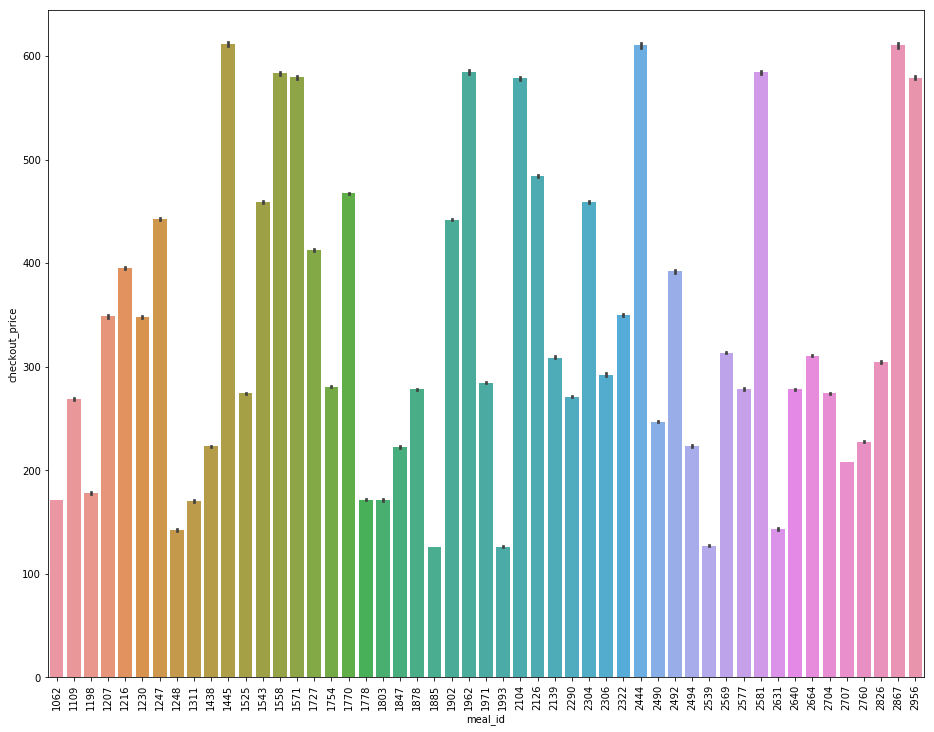

In [22]:
sns.barplot(train['meal_id'],train['checkout_price'])
plt.xticks(rotation = 90)

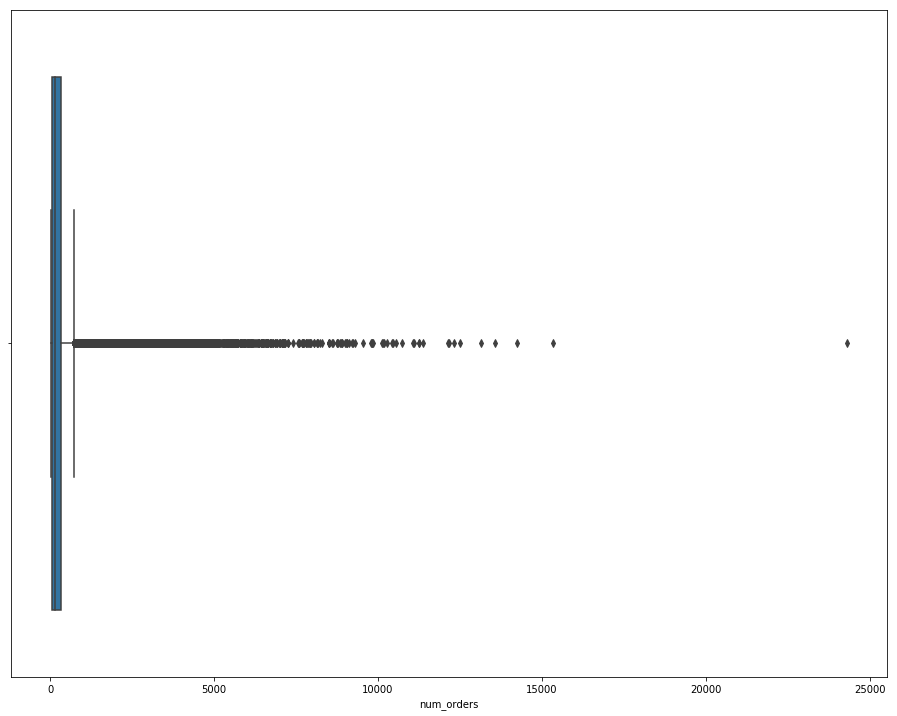

In [23]:
sns.boxplot(train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

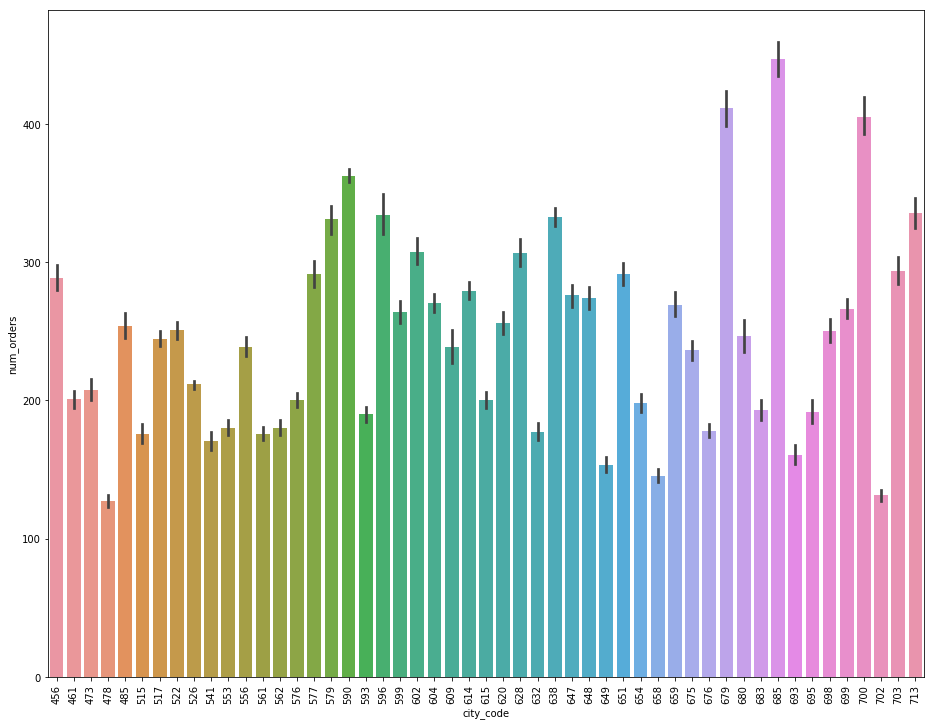

In [24]:
sns.barplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = 90)

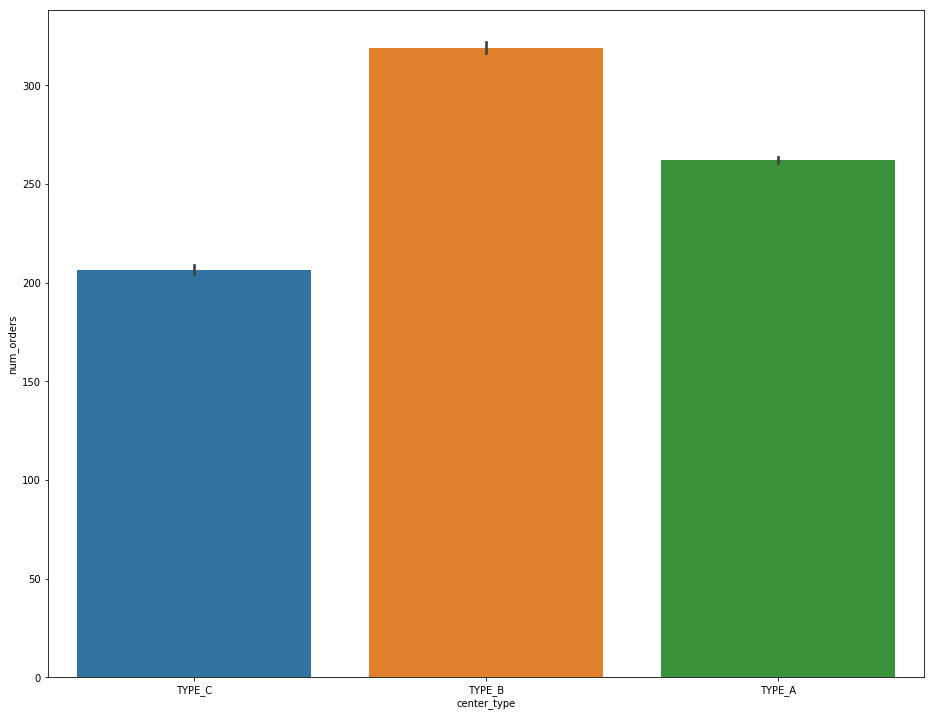

In [25]:
sns.barplot(train['center_type'],train['num_orders'])


In [26]:
train['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

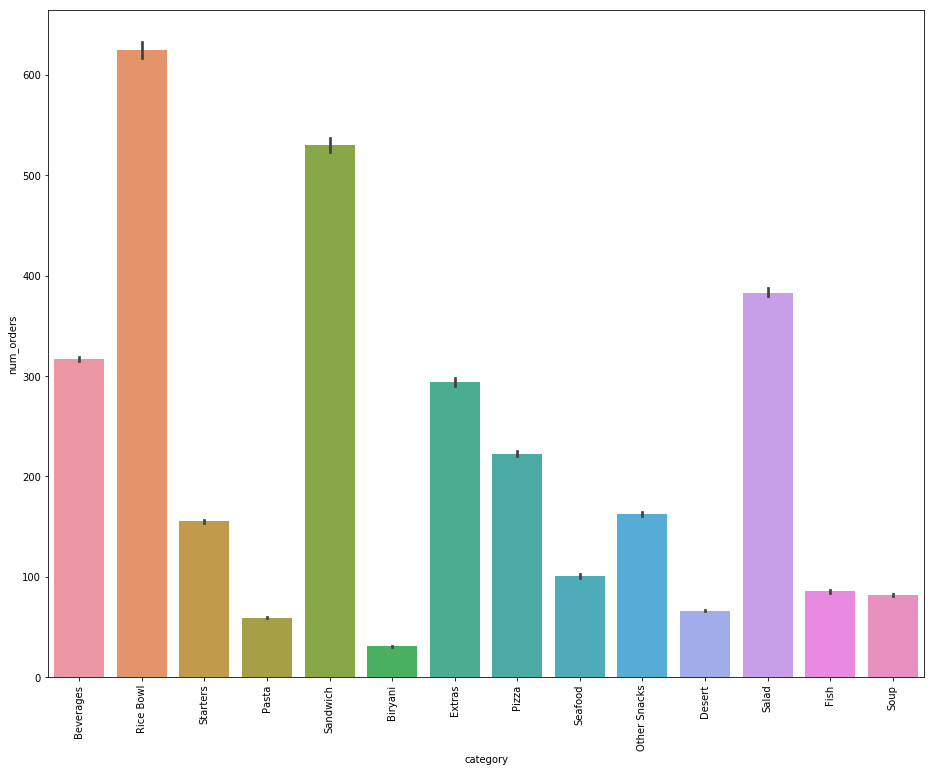

In [27]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = 90)

In [28]:
train['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [29]:
train.groupby('cuisine').num_orders.agg(['mean'])

,mean
cuisine,
Continental,164.545348
Indian,229.039037
Italian,359.347830
Thai,276.423411


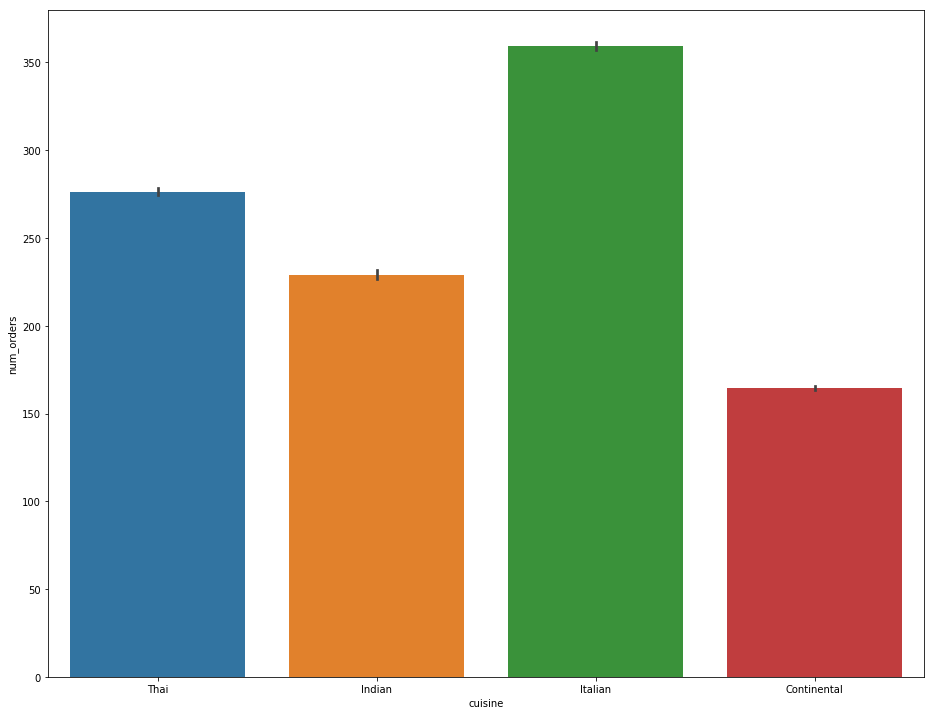

In [30]:
sns.barplot(train['cuisine'],train['num_orders'])

In [31]:
train['op_area'].unique()

array([2. , 3.6, 3.7, 5.3, 3.8, 6.7, 5.6, 3.9, 3.4, 5. , 2.8, 2.4, 4.8,
       4. , 4.6, 4.4, 4.5, 4.1, 0.9, 4.2, 2.9, 2.7, 4.7, 3.2, 3. , 7. ,
       1.9, 3.5, 6.3, 5.1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

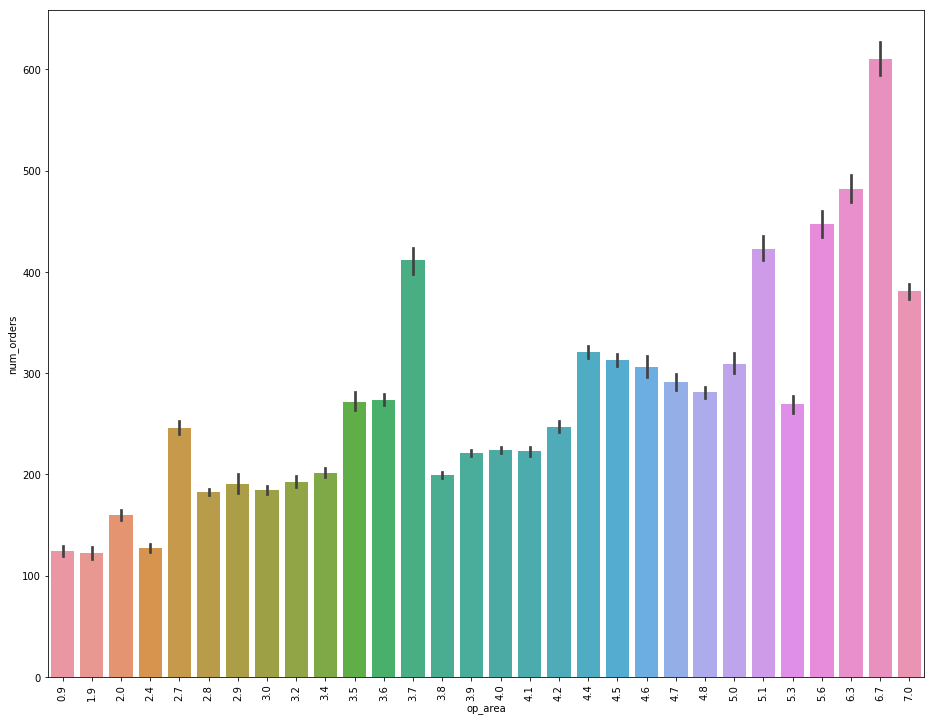

In [32]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = 90)

In [33]:
train['region_code'].unique()

array([56, 85, 77, 34, 35, 71, 93, 23])

In [34]:
train.groupby('region_code').num_orders.agg({'mean'})

,mean
region_code,
23,250.218527
34,206.075870
35,131.277356
56,316.481849
71,334.225648
77,216.987835
85,286.807318
93,238.820136


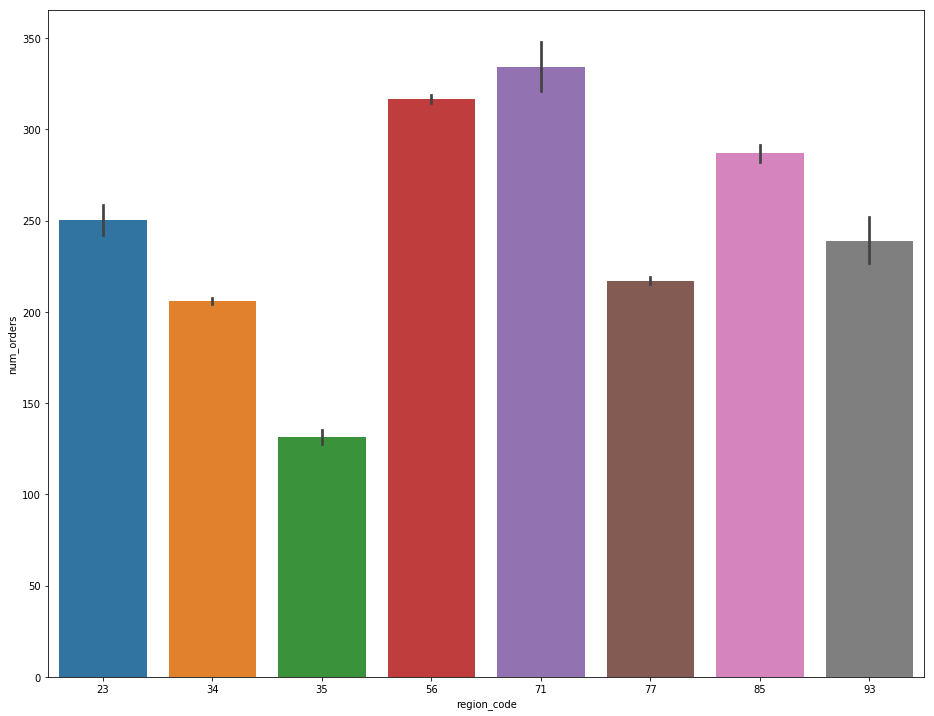

In [35]:
sns.barplot(train['region_code'],train['num_orders'])

In [36]:
train['emailer_for_promotion'].unique()

array([0, 1])

In [37]:
train.groupby('emailer_for_promotion').agg({'num_orders':['mean']})

,num_orders
,mean
emailer_for_promotion,
0,229.262883
1,631.097544


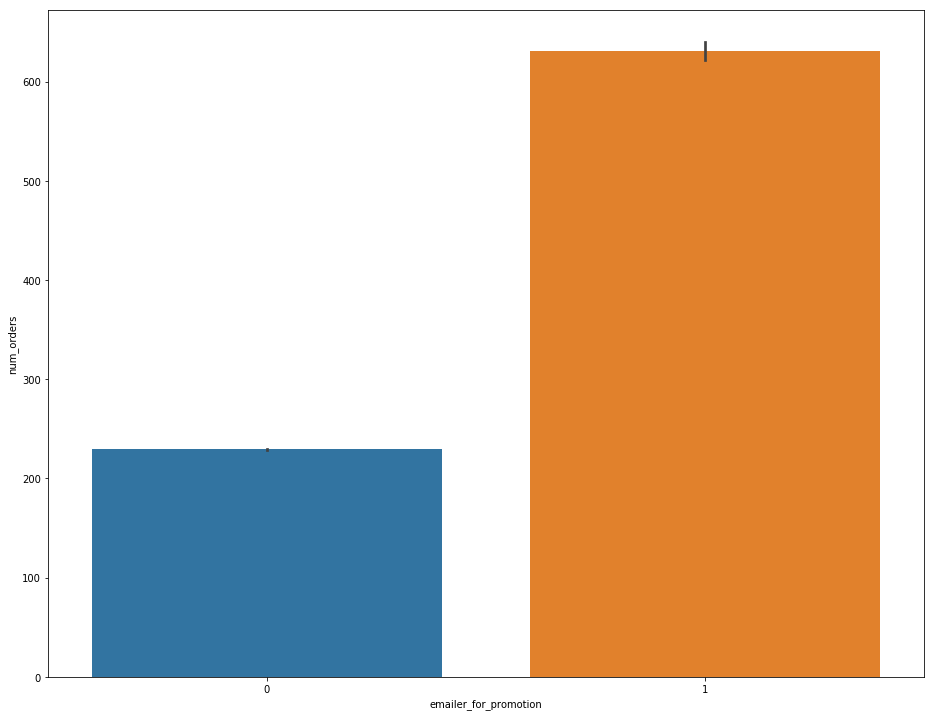

In [38]:
sns.barplot(train['emailer_for_promotion'],train['num_orders'])

In [39]:
train['homepage_featured'].unique()

array([0, 1])

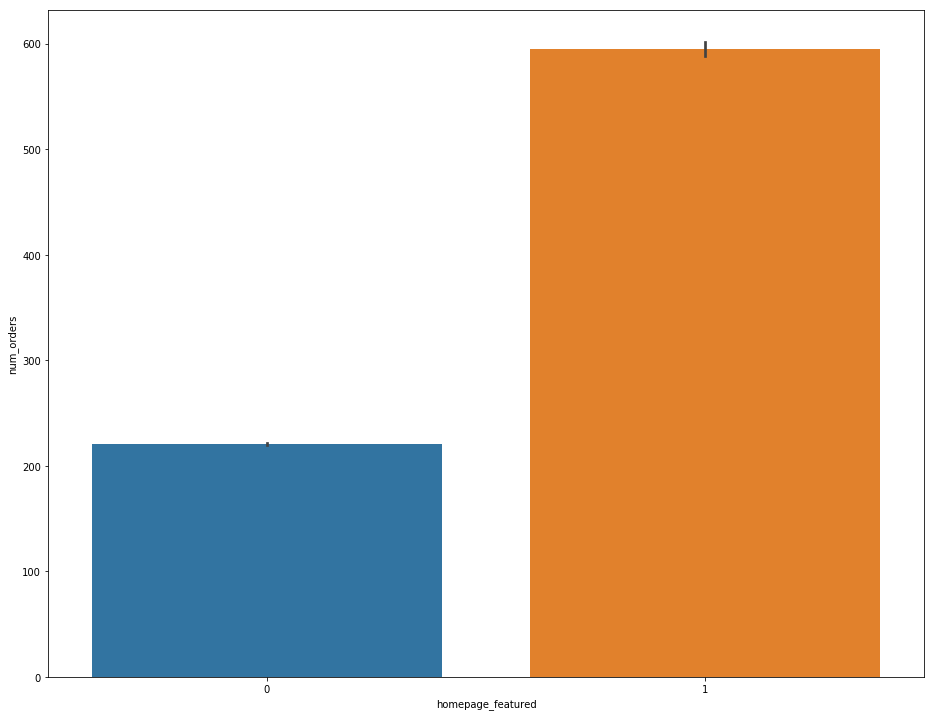

In [40]:
sns.barplot(train['homepage_featured'],train['num_orders'])

**Joint Distribution Plot** 

1.   Produces bivariate and univariate graphs
2.   You can draw histograms with scatter plot (default)


3.   Custom changes to be made to plot kernel density plots and regression
4.   Hexagonal pattern plots can also be obtained

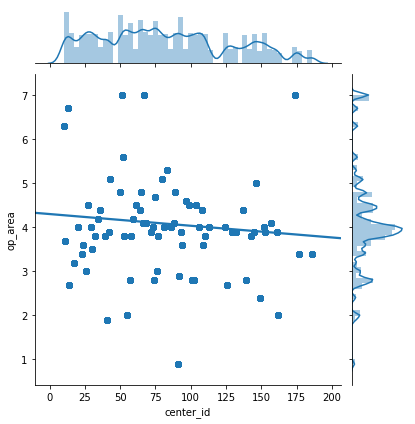

In [41]:
sns.jointplot(train['center_id'], train['op_area'], kind = 'reg') 

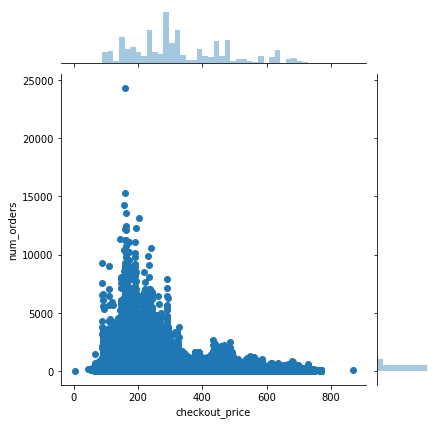

In [42]:
sns.jointplot(train['checkout_price'], train['num_orders']) 

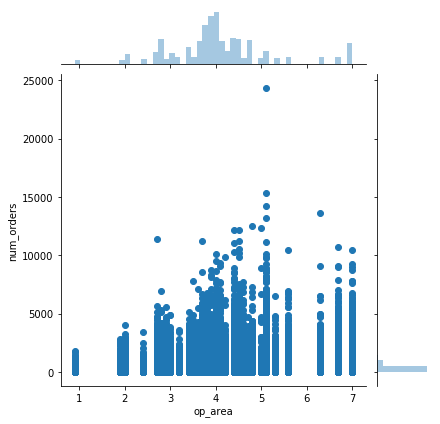

In [43]:
sns.jointplot(train['op_area'], train['num_orders'])

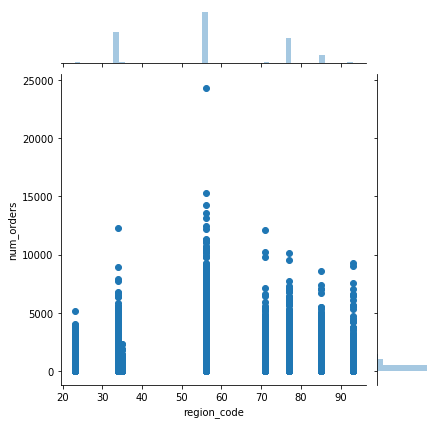

In [44]:
sns.jointplot(train['region_code'], train['num_orders'])

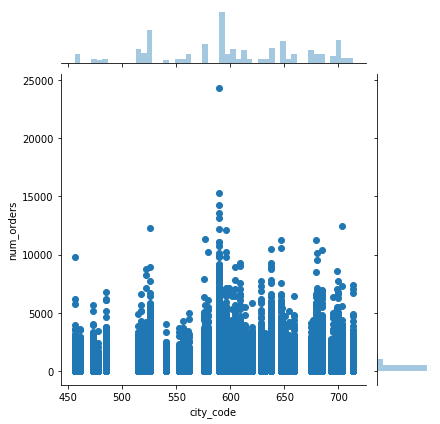

In [45]:
sns.jointplot(train['city_code'], train['num_orders'])

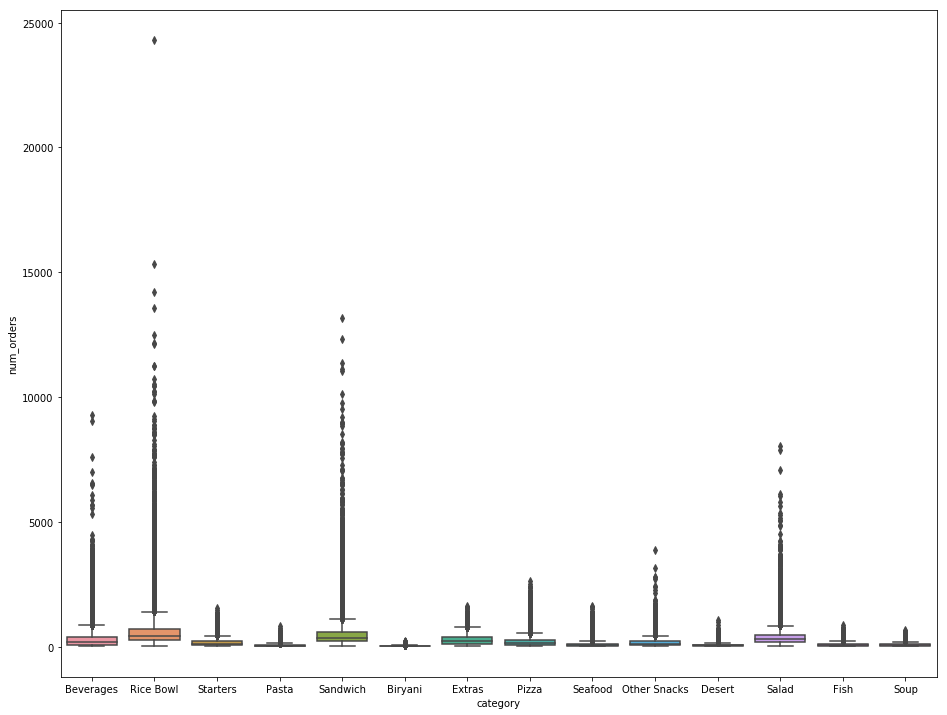

In [46]:
sns.boxplot('category','num_orders', data = train)

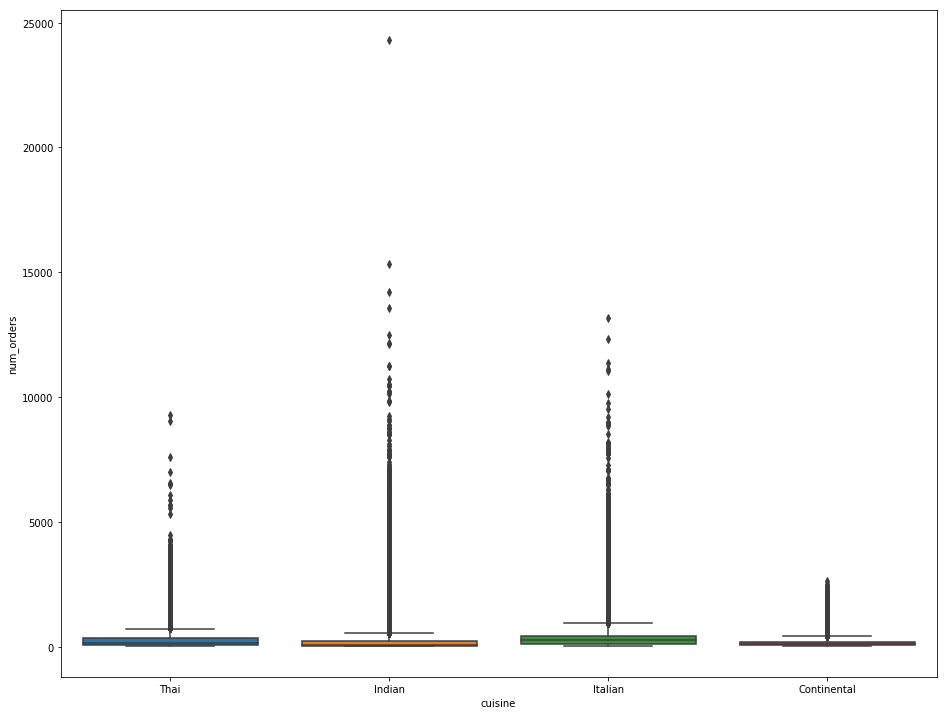

In [47]:
sns.boxplot('cuisine','num_orders', data = train)

In [48]:
print("The number of cities are : " +str(train['city_code'].nunique())) # nunique() will yield the length of unique() function

The number of cities are : 51


In [49]:
print("The number of meal_types sold are : " +str(train['meal_id'].nunique())) 

The number of meal_types sold are : 51


In [50]:
print("The number of centers are : " +str(train['center_id'].nunique())) # There are 77 centers in 51 cities

The number of centers are : 77


In [51]:
# Find the number of center-meal pairs 

center_meal_pairs = (train['center_id'].astype(str) + "-" + train['meal_id'].astype(str)).nunique() # astype() will type cast into given datatype
print("There are " + str(center_meal_pairs) + " center-meal pairs in the training dataset")

center_meal_test = (test['center_id'].astype(str) + "-" + test['meal_id'].astype(str)).nunique() # astype() will type cast into given datatype
print("There are " + str(center_meal_test) + " center-meal pairs in the testing dataset")

There are 3597 center-meal pairs in the training dataset
There are 3548 center-meal pairs in the testing dataset


In [52]:
print("There should be " +str(145*center_meal_pairs) + " entires in the training set")
print("But there are " + str(len(train['week'])) + " entries in the given training set")
print("The discrepancy in the entries implies that some of the centers didn't sell some type of meals for certain weeks")

There should be 521565 entires in the training set
But there are 456548 entries in the given training set
The discrepancy in the entries implies that some of the centers didn't sell some type of meals for certain weeks


In [53]:
print("There should be " +str(10*center_meal_test) + " entires in the testing set")
print("But there are " + str(len(test['week'])) + " entries in the given testing set")
print("The discrepancy in the entries implies that some of the centers didn't sell some type of meals for certain weeks")

There should be 35480 entires in the testing set
But there are 32573 entries in the given testing set
The discrepancy in the entries implies that some of the centers didn't sell some type of meals for certain weeks


In [54]:
class Employee():
  
  def __init__(self, name, id, salary):
    self.name = name
    self.id = id
    self.salary = salary
    
emp1 = Employee("Shreyas", 174104, 89000)
emp2 = Employee("Nishanth", 184104, 65000)

print(emp1.__dict__)
print(emp2.__dict__)

{'name': 'Shreyas', 'id': 174104, 'salary': 89000}
{'name': 'Nishanth', 'id': 184104, 'salary': 65000}


In [55]:
# Single Inheritance example
'''
enables a derived class to inherit properties/ behavior of the parent class
'''

class Emp(): # Parent class
  def __init__(self, name, id): # __init__ is a constructor which initializes the attributes with parameters passed in
    self.name = name
    self.id = id
    
class Fresher(Emp): # Child class which inherits properties/behaviour of parent class
  def __init__(self, salary, age, name, id):
    super().__init__(name, id)
    self.salary = salary
    self.age = age
    
emp1 = Fresher(89000, 24, "Shreyas", 104) # emp1 is an instance of the class. It is instntiated against the parameters passed in
print(emp1.age)
print(emp1.name)
print(emp1.id)
print(emp1.salary)
emp2 = Emp("Shreyas", 104)
print(emp2.name)

24
Shreyas
104
89000
Shreyas


In [56]:
# Multi level Inheritance

'''
enables a derived class o inherit from it's immediate parent class which further inherits properties 
from its parent class
'''

class animal(): # Super class
  
  def __init__(self, name, age):
    self.name = name
    self.age = age
    
class donkey(animal): # child class for animal and parent class for donkey_child
  
  def __init__(self, name, age, tail):
    super().__init__(name, age)
    self.tail = tail
    
class donkey_child(donkey): # child class for donkey
  
  def __init__(self, name, age, tail):
    super().__init__(name, age, tail)
    
ani1 = animal("donkey", 12)
ani2 = donkey("kussy", 13, "yes")
ani3 = donkey_child("Piss", 2, "No")

print(ani1.name)
print(ani3.name)
print(ani2.tail)

donkey
Piss
yes


In [57]:
# Hierarchical Inheritance

'''
enables morethan one derived class to inherit properties from the parent class

'''

class Animal():  # Parent class
  def __init__(self, name, age):
    self.name = name
    self.age = age
    
class donkey(Animal): # child class of animal
  def __init__(self, name, age, tail):
    super().__init__(name, age)
    self.tail = tail
    
class monkey(Animal): # child class of animal
  def __init__(self, name, age, gender):
    super().__init__(name, age)
    self.gender = gender
    
animal1 = Animal("ann", 12)
animal2 = monkey("yell", 2, "male")
animal3 = donkey("katthe", 3, "no")

print(animal2.gender)
print(animal3.age)
print(animal3.name)
print(animal1.age)

male
3
katthe
12


In [58]:
# Multiple Inheritance
'''
enables a derived class to inherit properties from morethan one parent class
'''

class Animal(): # Parent class 1
  def __init__(self, name, age):
    self.name = name
    self.age = age
    
class Bird(): # Parent class 2
  def __init__(self, name, age, wings):
    self.name = name
    self.age = age
    self.wings = wings
    
class dragon(Animal, Bird): # child class inheriting from both parent classes
  def __init__(self, name, age, wings):
    super().__init__(name, age)
    self.wings = wings
    
bird1 = dragon("apocalyptus", 23, "yes")

print(bird1.name)
bird1.wings

apocalyptus


'yes'

In [65]:
# Encapsulation

'''
Binding up of data in a single class
'''

class annamalai():
  def __init__(self):
    self.__salary = 45678
    
  def my_salary(self):
    return self.__salary
  
ob = annamalai()
ob.my_salary()
#print(ob.__salary) # double underscore indicates it as a private variable and hence it cannot be accessed directly. 

45678

In [73]:
# Encapsulation extended 

'''
Create a setter function which will give an indirect access to private class method
'''

class annamalai():
  def __init__(self):
    self.__salary = 45678
    
  def my_salary(self):
    return self.__salary
  
  def setmy_salary(self,salary): # setter function
    self.__salary = salary

oj = annamalai()
print(oj.my_salary()) # Gives an error as private variables cant be accessed directly
oj.__salary = 1000
print(oj.my_salary()) # This will not change the value of salary variable

oj.setmy_salary(salary = 30000) # private variables can be modified/accessed only through a function
print(oj.my_salary())

45678
45678
30000


In [83]:
from abc import ABC, abstractmethod

class employee(ABC):
  def what(self, id):
    print("kk")
    pass
  
class student(employee):
  def which(self, id):
    print("I'm Insidious and exorcist!! ")
    
emi = student()
print(emi.which(id))
emj = employee()
emj.what(id)

I'm Insidious and exorcist!! 
None
kk


In [87]:
class employee:
    def __init__(self, first, last, sal):
        self.fname=first
        self.lname=last   # Instance variables which are automatically called by __init__ function
        self.sal=sal
        self.email=first + '.' + last + '@company.com'
 
    def fullname(self):  # self is used while defining methods so that it will work with all instances
        return '{}{}'.format(self.fname,self.lname)
 
emp_1 = employee('aayushi','johari',350000)   # emp1 is also an instance variable
emp_2 = employee('test','test',100000)
print(emp_1.email)
print(emp_2.email)
print(emp_1.fullname())
print(emp_2.fullname())

aayushi.johari@company.com
test.test@company.com
aayushijohari
testtest


In [88]:
'''
class variables are shared among all instances of the class
Instance variables are unique to specific instance like name, email, age
'''

class employee:
    perc_raise =1.05 # class variable
    def __init__(self, first, last, sal):
        self.fname=first
        self.lname=last
        self.sal=sal
        self.email=first + '.' + last + '@company.com'
 
    def fullname(self):
            return '{}{}'.format(self.fname,self.lname)
    def apply_raise(self):
        self.sal=int(self.sal*employee.perc_raise)  # class variables are accessed by using the classname.classvariable
 
emp_1=employee('aayushi','johari',350000)
emp_2=employee('test','test',100000)
 
print(emp_1.sal)
emp_1.apply_raise()
print(emp_1.sal)

350000
367500


In [92]:
from abc import ABC, abstractmethod     
 
class Employee(ABC):
    @abstractmethod
 
    def calculate_salary(self,sal):
        pass
 
class Developer(Employee):
 
    def calculate_salary(self,sal):
        finalsalary= sal*1.10
        return  finalsalary
 
emp_1 = Developer()
print(emp_1.calculate_salary(10000))

#emp2 = Employee() # gives an error as abstract classes cannot be instantiated with objects


11000.0


In [100]:
class Alphabet: 
    def __init__(self, value): 
        self._value = value 
          
    # getting the values
    @property
    def value(self): 
        print('Getting value') 
        return self._value 
          
    # setting the values 
    def value(self, value): 
        print('Setting value to ' + value) 
        self._value = value 
          
    # deleting the values 
    def value(self): 
        print('Deleting value') 
        del self._value 
     
  
# passing the value 
x = Alphabet('GeeksforGeeks') 
print(x.value)

x.value = "shr"

del x.value

<bound method Alphabet.value of <__main__.Alphabet object at 0x7f38173f2ac8>>
